<a href="https://colab.research.google.com/github/prateekchandrajha/random-computational-finance/blob/main/random_numbers_monte_carlo_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Congruential Generators

Note that we are forced to use a for loop to generate these sequences because linear
congruential generators work recursively – as you generate a value in the sequence, you use
that value to generate the next value, and so on

In [1]:
def lin_con_gen(n, a, c, m, x_0):
  """generates n numbers from lin con generator"""
  random_list = [None]*n
  random_list[0] = (a*x_0+c)%m
  for i in range(1,n):
    random_list[i] = (a*random_list[i-1]+c)%m

  return random_list

In [2]:
lin_con_gen(23, 11, 5, 8, 21) # a random sample from a 𝑈(0,1) distribution

[4, 1, 0, 5, 4, 1, 0, 5, 4, 1, 0, 5, 4, 1, 0, 5, 4, 1, 0, 5, 4, 1, 0]

We will now move on to generating numbers from a multivariate normal distribution. All you
need for this, beyond the Python code, is a correlation matrix. Let’s say that our correlation
matrix is a 2x2 matrix and we want to create a 2x3 sample from a multivariate normal
distribution. The first thing we need to do is to decompose the correlation matrix using the
following code:

In [3]:
import numpy as np
Sigma = np.array([[1,0.5],[0.5,1]])
L = np.linalg.cholesky(Sigma)
L

array([[1.       , 0.       ],
       [0.5      , 0.8660254]])

We then generate an uncorrelated multivariate normal sample, and multiply the two out:

In [4]:
from scipy.stats import norm
uncorr_norms = norm.rvs(size=2)
corr_norms = np.matmul(L, uncorr_norms)

In [5]:
corr_norms

array([1.06095369, 1.31224057])

Generating uniform random numbers with SciPy
The SciPy package in Python includes a stats environment which allows for the generation of
random numbers from various distributions, as well as the ability to apply statistical tests to
variables.

## Inverse Tranform Method

In [6]:
from scipy.stats import uniform
import math
unif_array = uniform.rvs(size=10000)
lambda_val=1
expo_array = -np.log(1-unif_array)/lambda_val
expo_array

array([0.17818023, 0.03535299, 1.25340084, ..., 4.43839752, 0.32286468,
       0.80728397])

## How to use rejection sampling?

In [7]:
norm_size = 10000
norm_array = [None]*norm_size
count=0
lambda_val=1
c=math.sqrt(2*math.exp(1)/math.pi)

while count < norm_size:
  unif_val_1 = uniform.rvs(size=1)
  unif_val_2 = uniform.rvs(size=1)
  expo_val = -math.log(unif_val_2)/lambda_val
  norm_val = 2*math.exp(-expo_val**2/2)/math.sqrt(2*math.pi)

  if unif_val_1 < norm_val/(c*expo_val):
    unif_val_3 = uniform.rvs(size=1)
    if unif_val_3 < 0.5:
      norm_array[count] = expo_val
    else:
      norm_array[count] = -expo_val
    count+=1
  else:
    continue



In [8]:
import matplotlib.pyplot as plt

In [9]:
from scipy.stats import norm
norm.rvs(size=10000)

array([-1.75558373, -1.37976264,  1.2852889 , ..., -0.54801698,
        0.10835439,  0.81700088])

## Multivariate Normal

In order to generate random numbers from a multivariate normal distribution with non-zero
correlations, we have to make use of a convenient mathematical result. But first, let’s set the
scene:
Suppose we want to sample from 𝑋 ∼ 𝑀𝑉𝑁(0, Σ). Because Σ is a positive semi-definite matrix (as
it is a covariance matrix), there exists some matrix, 𝐿, such that Σ = 𝐿𝐿
′
, where 𝐿
′
is the
transpose of 𝐿. Observe now that we can write 𝑋 = 𝐿𝑌, where 𝑌 ∼ 𝑀𝑉𝑁(0,𝐼), where 𝐼 is the
identity matrix.
In other words, if you can find 𝐿, all you need to do to sample from a correlated multivariate
normal distribution is a sample from an uncorrelated normal distribution. Supposing we can
find this 𝐿, we can then generate 𝑋 through 𝑌 ∼ 𝑀𝑉𝑁(0,𝐼), where 𝐼 is the identity matrix. This is
because of the fact that 𝐿𝑌 ∼ 𝑀𝑉𝑁(0, 𝐿𝐼𝐿
′
) ∼ 𝑀𝑉𝑁(0, Σ), since 𝐿𝐿
′ = Σ.
There are potentially numerous solutions to the equation Σ = 𝐿𝐿
′
. One algorithm for generating
𝐿 is known as the Cholesky decomposition. This generates an 𝐿 that is lower triangular.
What is particularly convenient about the Cholesky decomposition is that the NumPy library
includes an operation for computing the decomposition on any positive semi-definite NumPy
array.

In [10]:
from scipy.stats import norm
uncorr_norms = norm.rvs(size=2)
corr_norms = np.matmul(L, uncorr_norms)
corr_norms


array([ 0.23511448, -0.32670391])

The variable corr_norms contains the two correlated random normals. Correlated numbers like
these can be used to simulate correlated stock prices in a Black-Scholes world by noting that,
within this framework, stock prices are log-normally distributed.

## Monte Carlo Simulation

Any integral can be re-expressed as an expectation of a function of a random
variable over a given set.

This theorem states that, as the number of random variables we simulate increases towards
infinity, the sample mean converges to the expected value of the function of the random
variables.

Because the Law of Large Numbers involves a limit as 𝑛 tends to infinity, the simulated
variables and the sample mean will not be exactly equal to the true underlying mean, since we
are only simulating finitely many variables. As a result, discrepancies will arise between the
Monte Carlo estimate and the true underlying values. We would like to quantify this error,
which is where the Central Limit Theorem comes in.

I have also chosen to represent our Monte Carlo estimates as a function of sample size. The
reason we do this is because it gives a good illustration of how the Monte Carlo estimate
converges to the true value. We will do this for all Monte Carlo estimations from this point
forward.

In [11]:
# Integrating sin(x)

np.random.seed(0)

msin_estimates = [None]*50
msin_std = [None]*50

for i in range(1,51):
  unif_array = uniform.rvs(size=i*1000)*np.pi
  sin_val = np.sin(unif_array)*np.pi
  msin_estimates[i-1] = np.mean(sin_val)
  msin_std[i-1] = np.std(sin_val)/np.sqrt(i*1000)

In [12]:
msin_estimates[-1]

1.9972970309287528

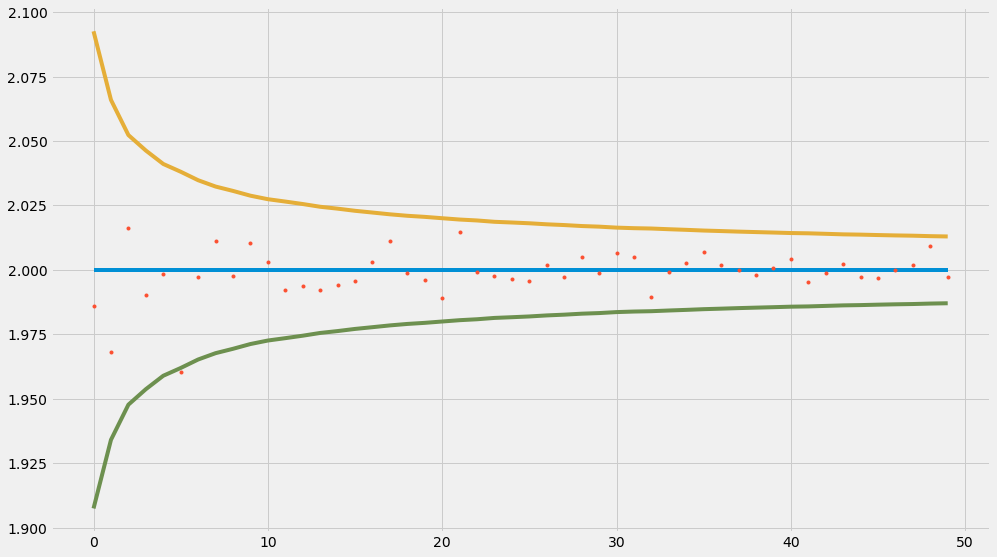

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 9))
plt.plot([2]*50)
plt.plot(msin_estimates, '.')
plt.plot(2 + np.array(msin_std)*3)
plt.plot(2 - np.array(msin_std)*3)
plt.show()

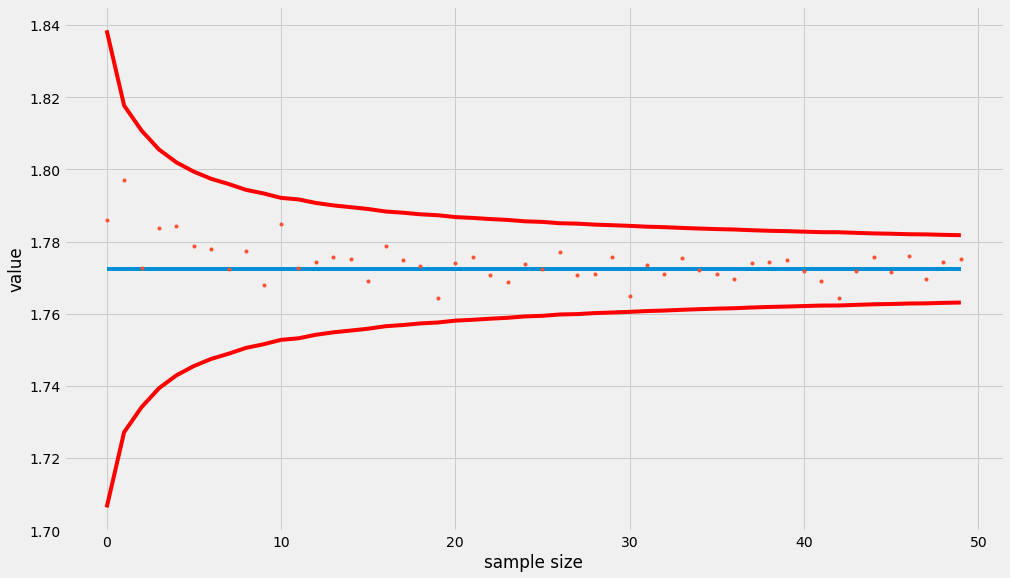

In [14]:
np.random.seed(0)

mexp_est = [None]*50
mexp_std = [None]*50

for i in range(1,51):
  norm_array = norm.rvs(size=i*1000)
  exp_value = np.exp(-norm_array**2/2)*np.sqrt(2*np.pi)
  mexp_est[i-1] = np.mean(exp_value)
  mexp_std[i-1] = np.std(exp_value)/np.sqrt(i*1000)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 9))
plt.plot([np.sqrt(np.pi)]*50)
plt.plot(mexp_est, '.')
plt.plot(np.sqrt(np.pi) + np.array(mexp_std)*3, 'r')
plt.plot(np.sqrt(np.pi) - np.array(mexp_std)*3, 'r')
plt.xlabel("sample size")
plt.ylabel("value")
plt.show()

Now that we’ve introduced Monte Carlo, and shown how to implement it in Python, we can
begin to apply it to pricing financial instruments. Initially, we are going to restrict ourselves to
pricing vanilla European options within a Black-Scholes framework – these options have a
closed-form solution to which we can compare our Monte Carlo estimates.

The Black-Scholes market model provides a stochastic differential equation which models the
changes in a given stock’s price over time. This model relies on a number of (unrealistic)
assumptions:

• There is a constant, continuously compounded, risk-free rate of 𝑟.

• There is no default risk, no transaction costs, no spreads, no tax, and no dividends.

• Markets are perfectly liquid with unlimited short selling permitted.

• No arbitrage is possible.

Under Black-Scholes, we have a filtered probability space (Ω,ℱ, 𝐹, 𝒫), where a stock price’s
dynamics are given by:
𝑑𝑆𝑡 = 𝜇𝑆𝑡𝑑𝑡 + σ𝑆𝑡𝑑𝑊𝑡
, 𝑆0 = 𝑆
(5)
where 𝑆𝑡
is the stock’s price at time 𝑡, μ and σ are known constants that represent the mean
return and volatility of the stock respectively, and 𝑊𝑡
is a standard Brownian motion. 

𝑑𝑆𝑡 = 𝑟𝑆𝑡𝑑𝑡 + σ𝑆𝑡𝑑𝑊𝑡(Q)

𝑆𝑇 = 𝑆0 exp ((𝑟 −
σ
2/
2
) 𝑇 + σ√𝑇𝑍)

Note that we import norm, since our stock prices
are going to be simulated using standard normal random variables.

In [15]:
# share specific info

risk_free = 0.1
S_0 = 100
sigma = 0.3

# option specific info

strike = 110
T = 1
current_time = 0

In [16]:
def terminal_share_price(S_0, risk_free_rate, sigma, Z, T):
  """generates the terminal share price given some random normal values, Z"""
  return S_0*np.exp((risk_free_rate - sigma**2/2)*T + sigma*np.sqrt(T)*Z)

def discounted_call_payoff(S_T, K, risk_free_rate, T):
  """function for evaluating the discounted payoff of call option in monte carlo estimation"""
  return np.exp(-risk_free_rate*T)*np.maximum(S_T-K,0)

We define two functions. The first function, terminal_shareprice (line 2), simulates the
share price at time 𝑇 according to equation (10). It takes in an initial share price, a risk-free rate,
and volatility, an array of standard normal random variables, and a terminal time. It returns an
array of terminal stock prices.
The second function, discounted_call_payoff, implements the formula for the value of a
call option as given in equation (12). It takes in an array of terminal stock values, a strike price, a
risk-free rate, and a terminal time. It returns an array which has the value of the call for each
terminal stock price.

In [17]:
mcall_estimates = [None]*50
mcall_std = [None]*50

#generating monte carlo estimates
for i in range(1,51):
  norm_array = norm.rvs(size=i*1000)
  term_val = terminal_share_price(S_0, risk_free, sigma, norm_array, T-current_time)
  mcall_val = discounted_call_payoff(term_val, strike, risk_free, T-current_time)
  mcall_estimates[i-1] = np.mean(mcall_val)
  mcall_std[i-1] = np.std(mcall_val)/np.sqrt(i*1000)

In [18]:
# analytical solution for vanilla european call option

d_1 = (math.log(S_0/strike)+(risk_free+sigma**2/2)*(T-current_time))/(sigma*math.sqrt(T-current_time))

d_2 = d_1 - sigma*math.sqrt(T-current_time)


In [19]:
analytic_callprice = S_0*norm.cdf(d_1)-strike*math.exp(-risk_free*(T-current_time))*norm.cdf(d_2)

In [20]:
analytic_callprice

12.131028958035898

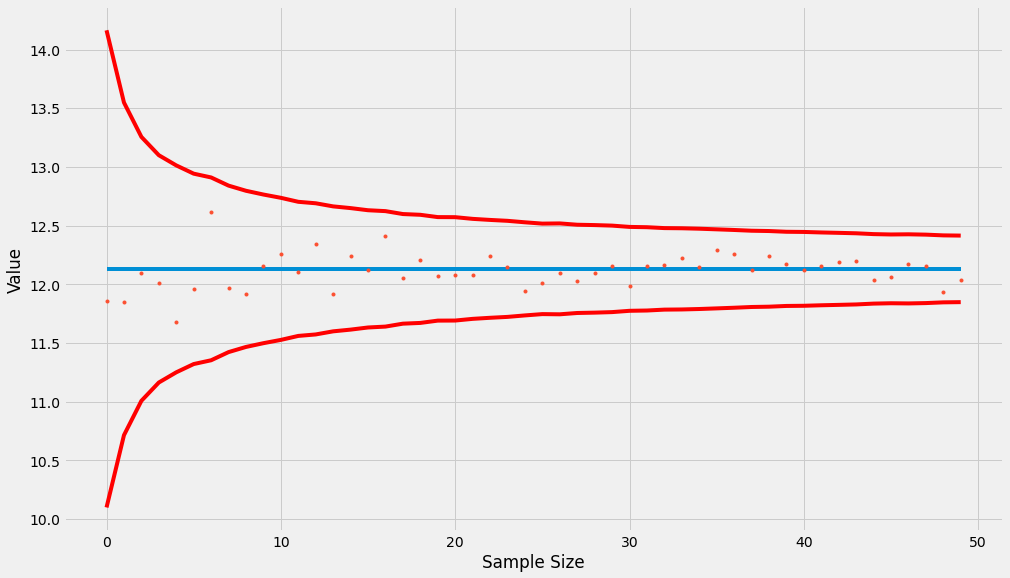

In [23]:
plt.figure(figsize=(15, 9))
plt.plot([analytic_callprice]*50)
plt.plot(mcall_estimates, '.')
plt.plot(analytic_callprice + 3*np.array(mcall_std), 'r')
plt.plot(analytic_callprice - 3*np.array(mcall_std), 'r')
plt.xlabel("Sample Size")
plt.ylabel("Value")
plt.show()